In [1]:
from PIL import Image, ImageEnhance
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

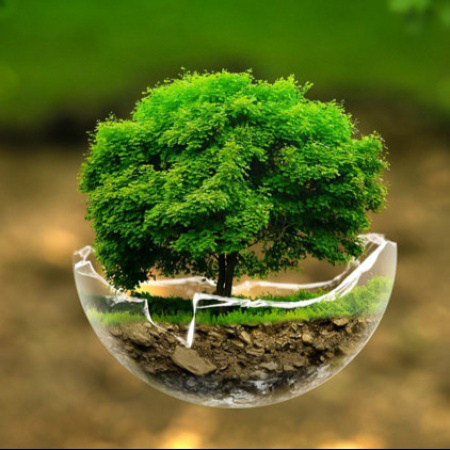

In [2]:
image = Image.open('/content/Nature.jpg')
image

In [3]:
with open('/content/file.txt', "rb") as dataFile:
  secretData = dataFile.read()

In [4]:
def getDataBits(data):
  bits = []
  for byte in data:
    for b in range(0,8):
      bits.append((byte >> b) & 0b1)

  return bits

def putDataInsideImage(im, data):
  dataBits = getDataBits(data)

  maxX = im.size[0]
  maxY = im.size[1]
  maxC = len(im.getpixel((0,0)))

  x = 0 
  y = 0 
  c = 0 

  for bit in dataBits:
    color = list(im.getpixel((x,y)))
    color[c] = (color[c] & (~0b1)) | bit;
    im.putpixel((x,y), tuple(color)) 

    c = c + 1 
    if c >= maxC:
      c = 0
      x = x + 1 
      if x >= maxX:
        x = 0
        y = y + 1 
        if y >= maxY:
          print("Not enough space")
          return

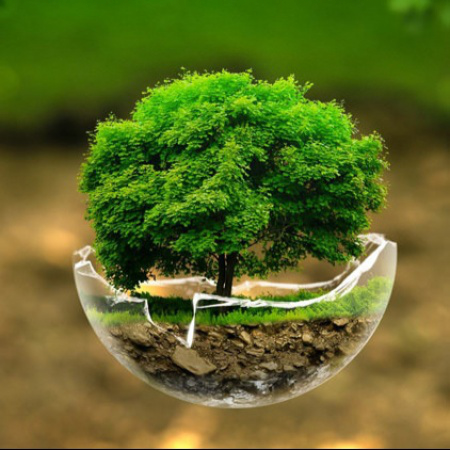

In [5]:
putDataInsideImage(image, secretData)
image.save('/content/encodedImage.png')
image

In [6]:
def getBitsFromImage(im, maxBits = 0):
  bits = []

  maxC = len(im.getpixel((0,0)))
  for y in range(0, im.size[1]):
    for x in range(0, im.size[0]):
      for c in range(0, maxC):
        bits.append(im.getpixel((x,y))[c] & 0b1)
        if maxBits != 0 and len(bits) >= maxBits:
          return bits

  return bits

In [7]:
def bitsToBytes(dataBits):
  dataBytes = []
  for i in range(0, len(dataBits), 8):
    if i+7 >= len(dataBits):
      break
    
    currByte = 0
    for b in range(0, 8):
      currByte = currByte | (dataBits[i + b] << b)

    dataBytes.append(currByte)

  return(bytes(dataBytes))

In [8]:
def getDataFromImage(im):
  dataBits = getBitsFromImage(im)
  return bitsToBytes(dataBits)

In [9]:
imO = Image.open('/content/encodedImage.png')
with open('/content/decodedFile.txt', "wb") as dataFile:
  dataFile.write(getDataFromImage(imO))